In [ ]:
#Practical Assignment No: 02
#To Implement Feedforward neural networks with Keras and TensorFlow.

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist 

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
print("[INFO] accessing MNIST...")

[INFO] accessing MNIST...


In [7]:
((trainX, trainY), (testX, testY)) = mnist.load_data()

In [9]:
trainX.shape

(60000, 28, 28)

In [11]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [13]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [15]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [19]:
model = Sequential()

In [21]:
model.add(Dense(256, input_shape=(784,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [23]:
print("[INFO] training network...")
Adm = Adam(0.01)
model.compile(loss="categorical_crossentropy", optimizer=Adm, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8520 - loss: 0.4691 - val_accuracy: 0.9611 - val_loss: 0.1336
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9607 - loss: 0.1327 - val_accuracy: 0.9569 - val_loss: 0.1444
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9705 - loss: 0.1022 - val_accuracy: 0.9588 - val_loss: 0.1507
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9733 - loss: 0.0922 - val_accuracy: 0.9705 - val_loss: 0.1227
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9776 - loss: 0.0803 - val_accuracy: 0.9643 - val_loss: 0.1525
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9786 - loss: 0.0742 - val_accuracy: 0.9692 - val_loss: 0.1226
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9810 - loss: 0.0703 - val_accuracy: 0.9704 - val_loss: 0.1195
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9

In [26]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.91      0.99      0.95      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



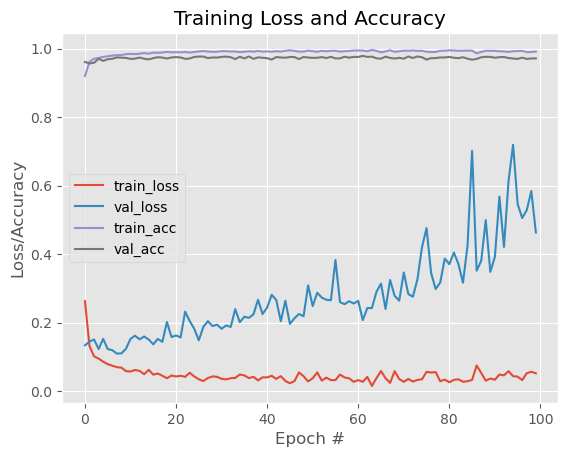

In [28]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"],label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
